Customer Churn Analysis

Evaluation Project - 9
Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score



In [2]:
# Loading the CSV with pandas
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc.

In [3]:
data.shape  # this shows 21 columns and 7043 rows in dataset


(7043, 21)

In [4]:
data.info()  # column details


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.dtypes # types of data in dataset


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.¶Also, converting Total Charges to a numerical data type.

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [8]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [9]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

# Correlations between customer data features and customer churn
Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

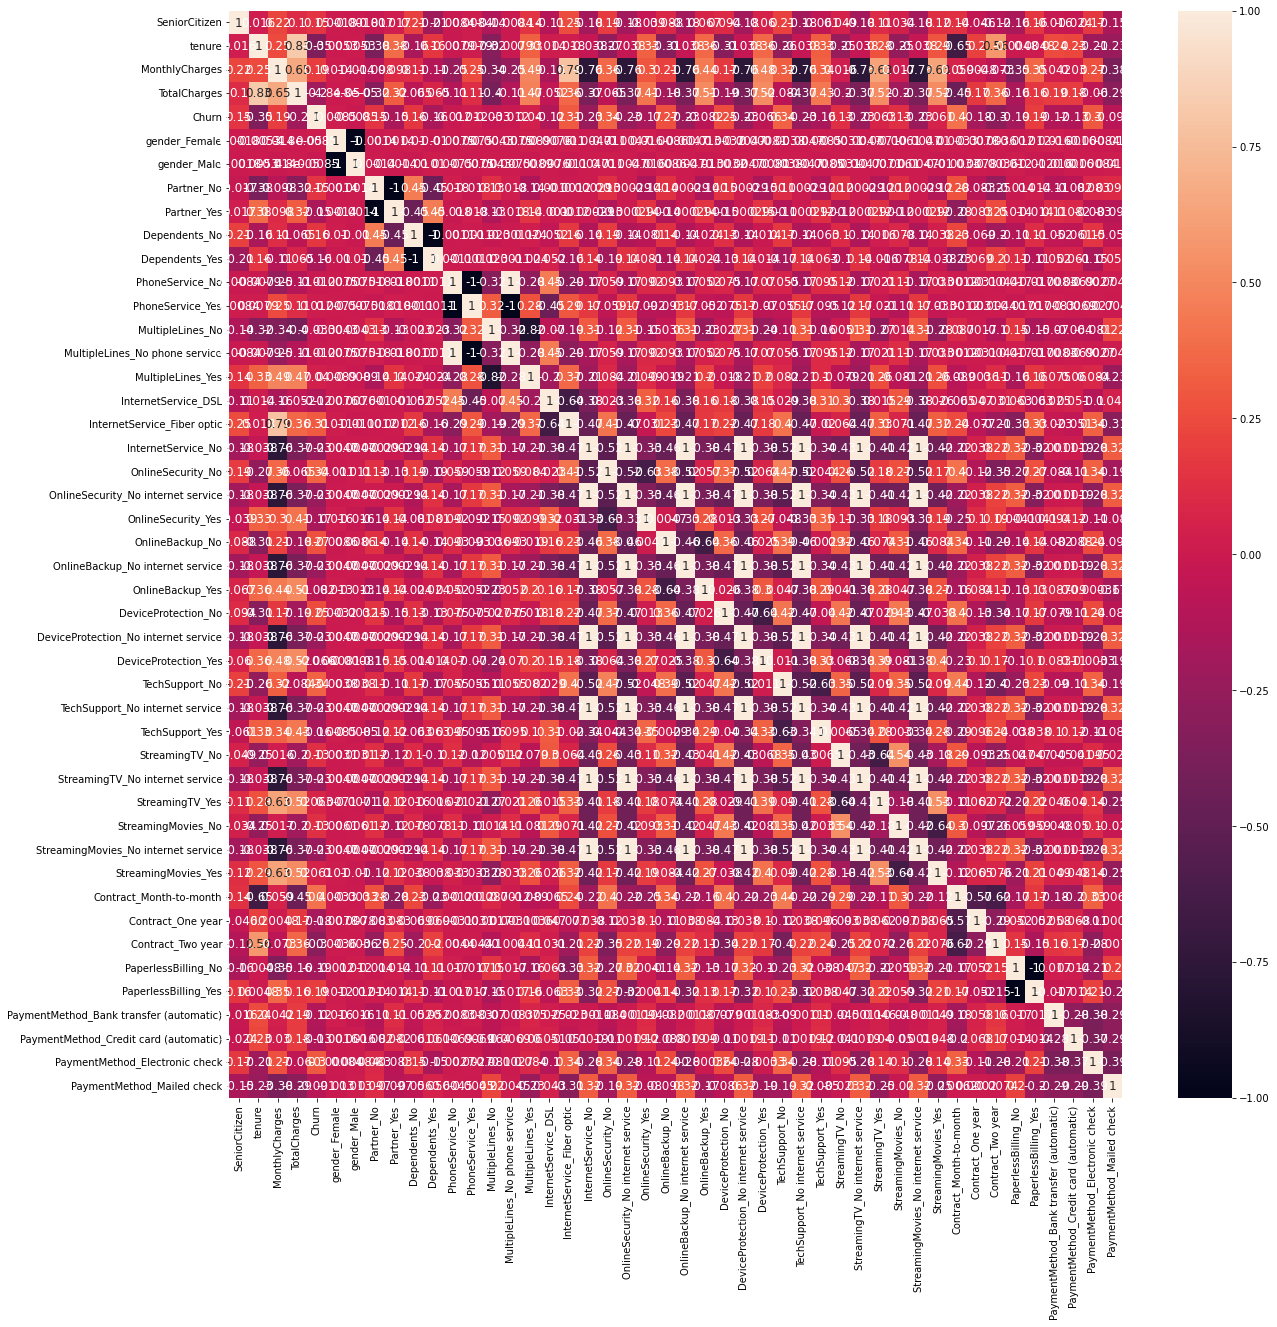

In [10]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.


<AxesSubplot:>

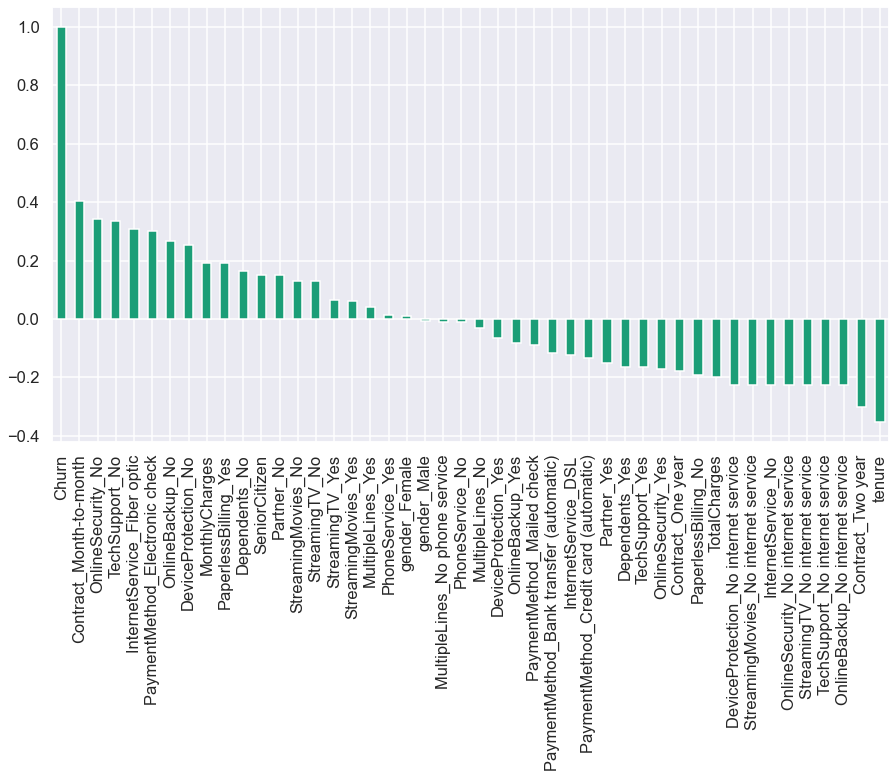

In [11]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.

Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

In [12]:
df_dummies.corr()  # reporting correlation matrix


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


# Data exploration and Visualisation


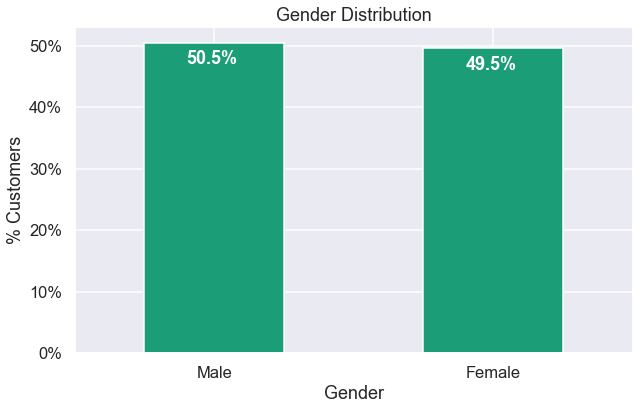

In [13]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')


Text(0.5, 1.0, '% of Senior Citizens')

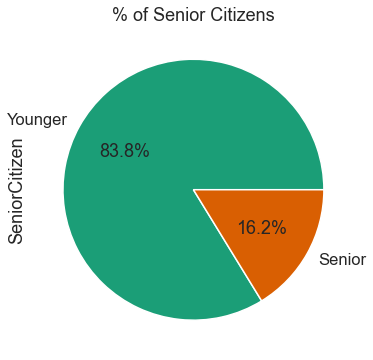

In [14]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

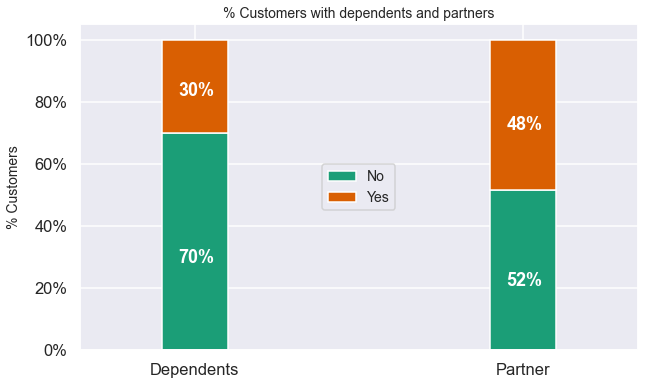

In [15]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents.

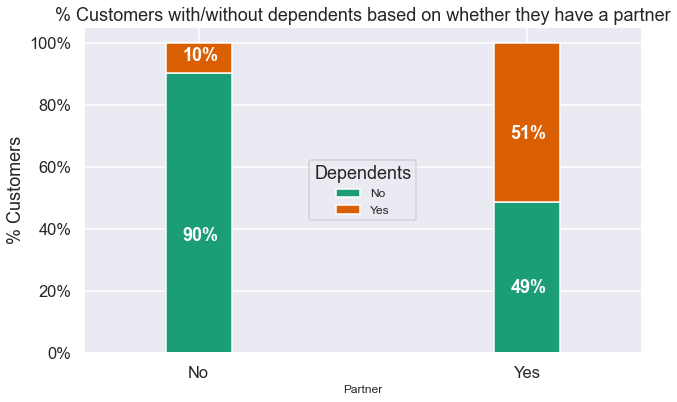

In [16]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

# Customer Account Information


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by tenure')

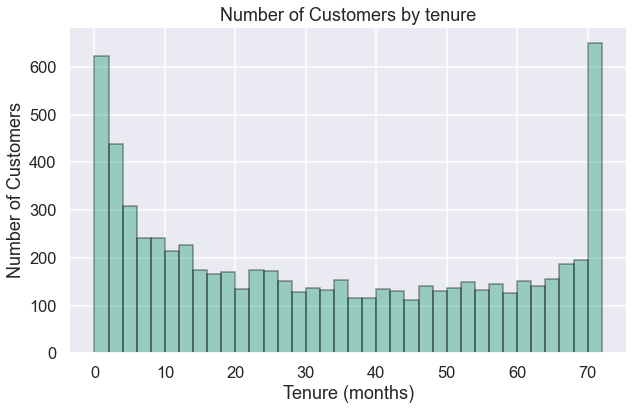

In [17]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

# Checking the customers by tenure of contract


Text(0.5, 1.0, 'Number of Customers by Contract Type')

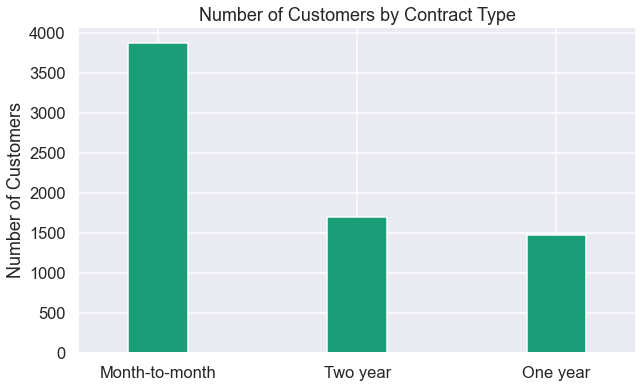

In [18]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

Text(0.5, 1.0, 'Two Year Contract')

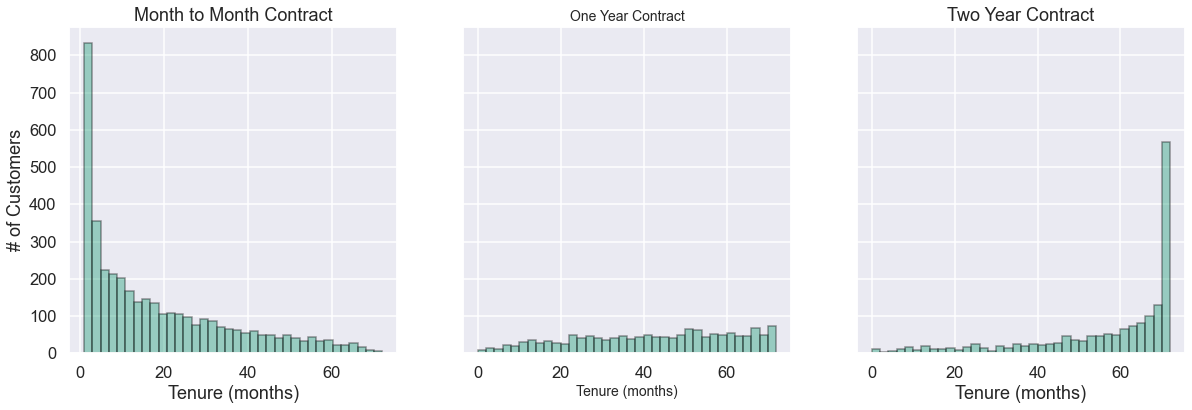

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

# Visualization of the distribution of various services used by customers


In [20]:
data.columns.values  


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

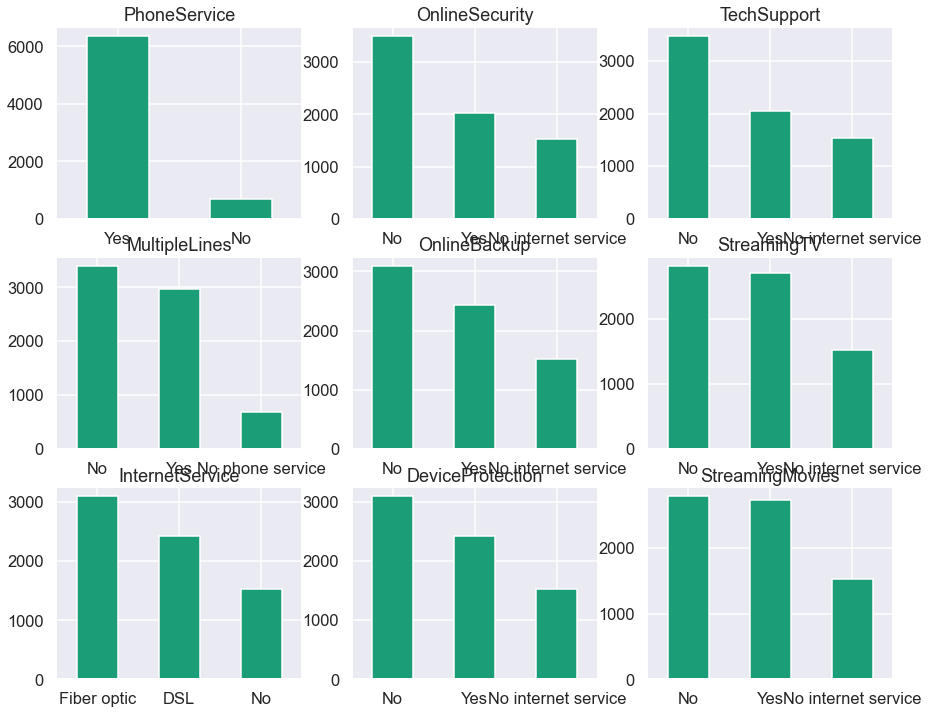

In [21]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.



# Datamining to check prediction variable and it's interaction with other variables


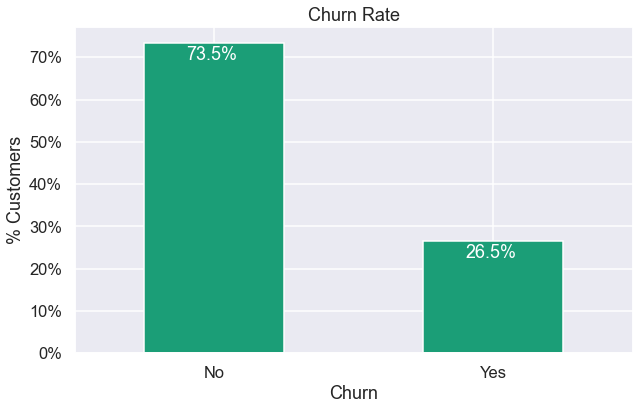

In [22]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

Text(0, 0.5, 'Monthly Charges')

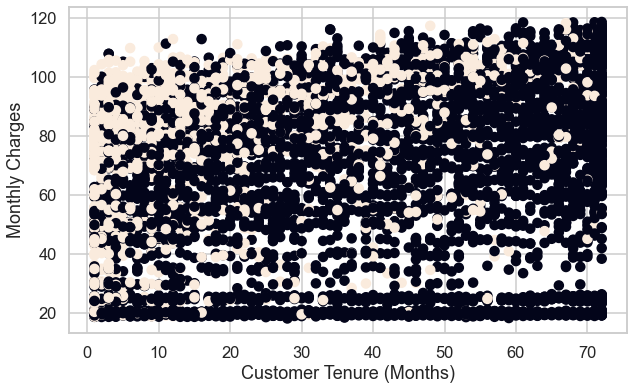

In [23]:
rcParams['figure.figsize']=10,6
sns.set(style='whitegrid', context='talk', palette='Greens')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

It’s hard to draw any conclusions from this visualization which compares the customer’s tenure with their monthly charges. So, this plot has been redrawn on boxplot for better visualization. However, from below plot, it can be clearly seen that, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

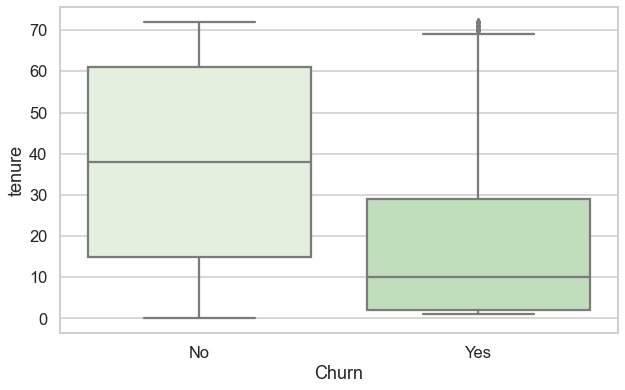

In [24]:
sns.boxplot(x = data.Churn, y = data.tenure)


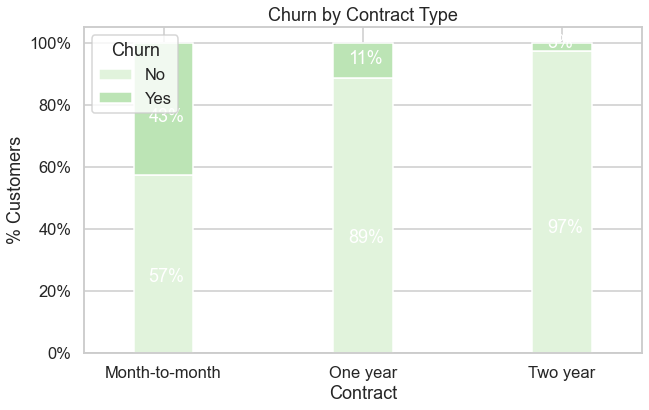

In [25]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

Above plot too is no different from the correlation plot and information we obtained so far, the customers who have a month to month contract have a very high churn rate. This gives some valuable input to sales/marketing department.

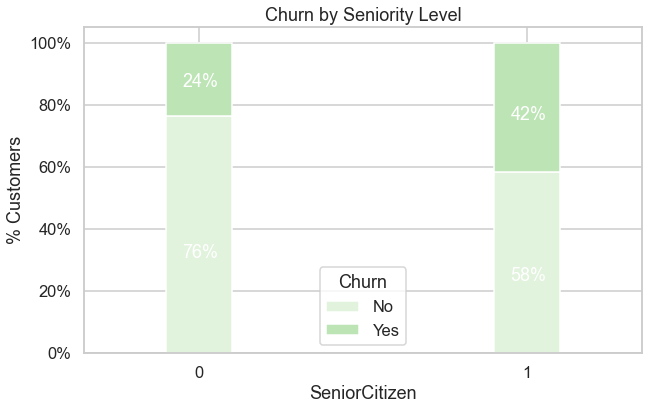

In [26]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')  

From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

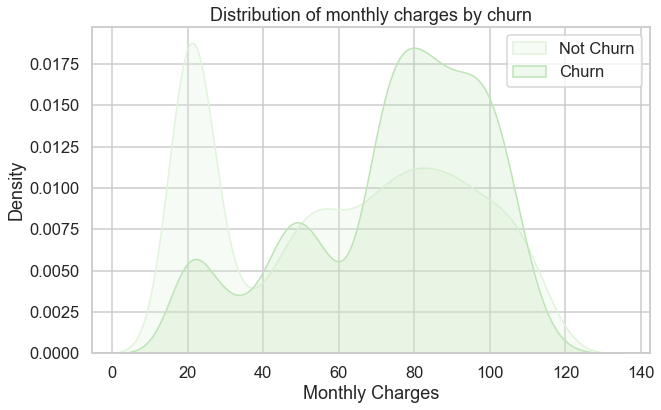

In [27]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## Assumptions
For the purpose of this analysis, 2 assumptions can be made:

1) For each customer that left the company, it would cost Telco dollar 500.00 to replace that customer. Marketing, ads, campaigns, and outreach — the cost adds up.

2) Retain each customer who was likely to churn by investing dollar 100 in them. This could be through discounts, improving service (upping their internet speed, for example), or offering perks.

Above measures are part of diagnostic analytic.

## Predictive modelling
We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, as discussed in the begining, Total Charges will be removed.

In [28]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


# Spiliting the data
X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [29]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


## Logistic regression
Using machine learning algorithm and the dependent variable here churn 1 or churn 0 is categorical. The trained model can be used to predict if a customer churned or not for the test dataset. The results are saved in “prediction_test” and afterwards the accuracy score is measured and printed.

In [30]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [31]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796455]
Regression: [[ 0.18715203 -2.43931051 -0.00852661  0.01488481 -0.01485236  0.01063184
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.22540661 -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485146  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


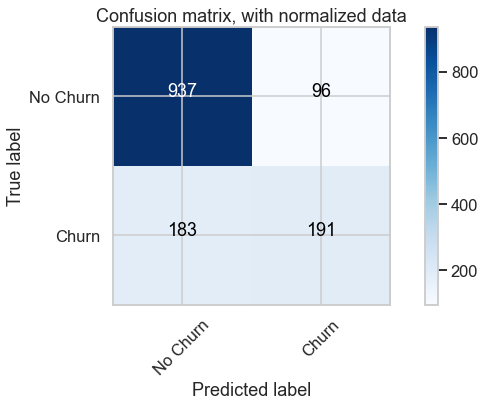

In [32]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered.
However, the precision (0.66%) and recall (0.51%) for predictions in the positive class (churn) are relatively low, which suggests the data set may be imbalanced.

The confusion matrix clearly shows the model performance broken down into true positives, true negatives, false positives, and false negatives.

Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives.

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

The end goal for the project is to know every single customer who will churn and how much insight can be generated. Target is to focus on to keep the cutomers and how much company could spend to keep them before having them as a customer turned into a loss. So considering the final goal is to reduce churn and take the right preventing actions in time, need to check which independent variables have the most influence on the predicted outcome. Therefore setting the coefficients in the model to zero and reviewing at the weights of each variable.

In [33]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [34]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

Some of the variables do not make sense in the first point.



In [35]:
! pip install scikit-plot


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

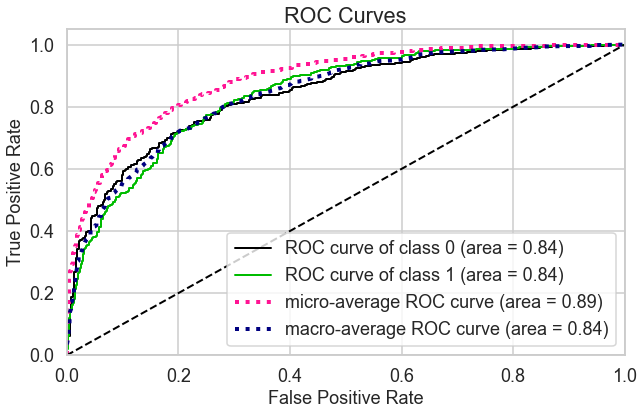

In [36]:
import scikitplot as skplt #to make things easy
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)



AUC is 0.84 means there is 84% chance that model will be able to distinguish between Churn and NoChurn.

## Handling imbalanced classes

In [37]:
df_dummies['Churn'].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

The class for churn is only around 30% of the total population of samples. There is a real risk thatthe model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, need to randomly duplicate observations from the minority class.

In [38]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, will train another logistic regression model


In [39]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

In [40]:
# import packages
import yellowbrick
from yellowbrick.classifier import ClassificationReport

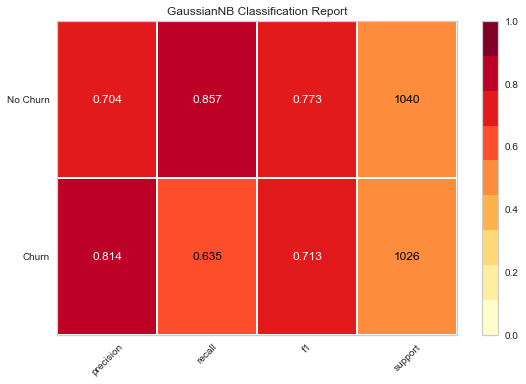

In [41]:
classes=['Churn','No Churn']

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit the visualizer and the model
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data



The model’s precision for No Churn 69%) is lower than Churn (82%) but precision is higher (86%) than churn (62%). The F1-score for the NoChurn is higher (76.6%), while for the Churn is is 71%. The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved in this model.

In [42]:
# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.7513171952316688


AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.
## K-fold cross validation
10-fold Cross-validation is used to estimate the skill of model. On each fold, it splits the data into a training set and a testing set fits itself on the training set and evaluates itself on the testing set using the concordance measure by default.

In [43]:

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


Model has provided 80% accuracy so far after all necessary validation and cross validation.
## Survival Analysis
Logistic Regression is assigning a probability to each observation that describes how likely it is to belong to the positive class.

In any large enough group of customers like Telecom there are going to be people who have the same attributes / features. Some of those will churn and some of them won’t, and what Telecom company ideally like to know is the probability of churn for each group. This is what Logistic Regression provides. But it is not clear what time scale it is predicting for. Therefore, survival analysis was conducted for this purpose.

### Kapalan-Meier and Cox Proportional Hazards Model
Kapalan is fully parametric and the Cox PH Model is semi-parametric.

Kapalan-Meier Kaplan-Meier need specification of the distribution of the underlying hazard. CoxPH analyses the covariates (features) of a dataset with regards to how long a customer survives. It describes how each feature proportionally increases risk over the baseline survival rate for a cohort.



#### For each customer, two important data points for survival analysis are required
‘Tenure’: how long they have been a customer when the data is observed ‘Churn’: whether or not the customer left when the data was observed

In [44]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


Kaplan-Meier


In [45]:
!pip install lifelines==0.26.3


### Kaplan-Meier


In [46]:
import lifelines
from lifelines import KaplanMeierFitter

# fitting kmf to churn data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

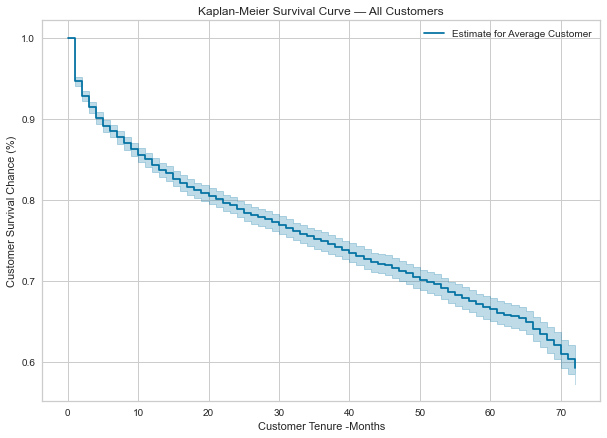

In [47]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()



To examine the effects of different variables, the Cox Proportional Hazards Model is used.



#### Applying Cox Proportional Hazard Model


In [48]:
a = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
a.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [49]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [50]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [51]:
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [52]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

,SeniorCitizen,tenure,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,Churn_Yes
0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,29.85,29.85,0
1,0,34,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,56.95,1889.50,0
2,0,2,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,53.85,108.15,1
3,0,45,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,42.30,1840.75,0
4,0,2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,70.70,151.65,1


###### Head of the dummied and reduced dataset; Gender_Male has disappeared, as has Partner_No, Dependents_No and so on. For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the colulmns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables.
For CoxPH test, Churn column is the event observation in the single dataset that’s passed to the fit call. Need to split dataset in two (train and test).

In [53]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4130 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1504
   partial log-likelihood = -9854.172
         time fit was run = 2022-01-17 12:34:00 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.003      1.003      0.055           -0.105            0.111                0.901                1.117
gender_Female                            0.064      1.066      0.047           -0.027            0.156                0.973                1.169
Partner_Yes                             -0.170      0.843      0.054           -0.276           -0.065                0.759                0.937
Dependents_Yes                          -0.092      0.912      0.073           -0.235            0.051                0.791                1.053
PhoneService_Yes                         0.976      2.653      0.470            0.054            1.897                1.056                6.665
MultipleLines_Yes                        0.085      1.089      0.122           -0.154            0.324                0.857                1.383
InternetService_DSL                      2.460     11.702      0.618            1.248            3.672                3.482               39.327
InternetService_Fiber optic              3.712     40.952      1.150            1.458            5.967                4.296              390.377
OnlineSecurity_Yes                      -0.200      0.819      0.131           -0.455            0.056                0.634                1.058
OnlineBackup_Yes                        -0.008      0.992      0.121           -0.246            0.230                0.782                1.259
DeviceProtection_Yes                     0.128      1.137      0.124           -0.114            0.371                0.892                1.449
TechSupport_Yes                         -0.033      0.968      0.128           -0.284            0.218                0.753                1.244
StreamingTV_Yes                          0.380      1.462      0.228           -0.068            0.827                0.934                2.287
StreamingMovies_Yes                      0.405      1.500      0.229           -0.044            0.855                0.957                2.351
Contract_One year                       -1.231      0.292      0.130           -1.486           -0.975                0.226                0.377
Contract_Two year                       -3.640      0.026      0.284           -4.197           -3.083                0.015                0.046
PaperlessBilling_Yes                     0.134      1.144      0.060            0.016            0.253                1.016                1.287
PaymentMethod_Bank transfer (automatic) -0.602      0.548      0.093           -0.785           -0.420                0.456                0.657
PaymentMethod_Credit card (automatic)   -0.562      0.570      0.094           -0.746           -0.379                0.474                0.685
PaymentMethod_Electronic check          -0.160      0.852      0.074           -0.306           -0.014                0.736                0.986
MonthlyCharges                           0.006      1.006      0.022           -0.038            0.050                0.962                1.051
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.001                0.998                0.999

                                              z       

###### Observations can come with weights, as well interms of weights may be integer values representing some commonly occurring observation, or they may be float values representing some sampling weights (e.g. inverse probability weights). When using sampling weights, it's correct to also change the standard error calculations. So, used robust fit method.
#### The summary statistics above indicates the significance of the covariates in predicting the churn risk.
In the above regression, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral.
Customers whose PaymentMethod_Electronic check are more likely to churn; likewise, paperless billing customers are more likely to cancel their servie (1.12 times). Below plot displays a clear image of expected churn placed in order from high to low risk.
Internet service (DSL & Fiber), contract ( 1& 2 years), payment method and total charges play significant role in predicting the churn, whereas all the other covariates are not significant.
Interesting point to note here is that , the β (coef ) values in case of covariates TotalCharges is zero (~-0.00), but still the TotalCharges plays a significant role in predicting churn. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant.
We can see the number of observations listed as n=5634, number of events (churned customers)=1482 coefficients of the model are very important and they tell us how each feature increases risk. The positive number that attribute makes a customer more likely to churn, and negative means customers are less likely to churn.
We get the concordance (0.929 = 0.93). This is an assessment of how internally consistent the model is. Concordance of 0.93 suggests a good model. The concordance score evaluates the relative rankings of subject's event times i.e. we can multiple by a positive constant, or add a constant, and the rankings won't change). A model maximized for concordance- index will give good predicted rankings.

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

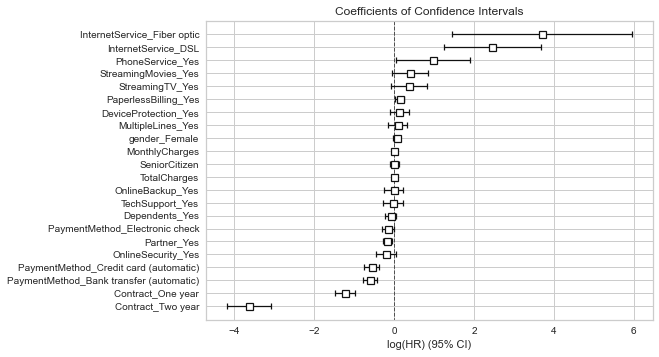

In [54]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

# So here we are looking at the different survival curves for customers whose TotalCharges are near zero compared to those 
# whose TotalCharges are closer to 4000.

#####  Testing the proportional hazard assumptions


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



C:\Users\hp\anaconda3\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4130 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             50.77 <0.005     39.81
                                        rank           48.76 <0.005     38.33
Contract_Two year                       km             62.92 <0.005     48.72
                                        rank           52.43 <0.005     41.03
Dependents_Yes                          km              0.00   0.95      0.08
                                        rank            0.02   0.90      0.15
DeviceProtection_Yes                    km              0.23   0.63      0.66
                                        rank            0.71   0.40      1.33
InternetService_DSL                     km              5.64   0.02      5.83
                                        rank            8.70 <0.005      8.30
InternetService_Fiber optic             km              2.67   0.10      3.29
                                        rank            4.51   0.03      4.89
MonthlyCharges                          km              0.50   0.48      1.07
                                        rank            0.31   0.58      0.79
MultipleLines_Yes                       km              0.12   0.73      0.46
                                        rank            1.13   0.29      1.80
OnlineBackup_Yes                        km              0.17   0.68      0.55
                                        rank            0.69   0.41      1.30
OnlineSecurity_Yes                      km              0.59   0.44      1.18
                                        rank            1.75   0.19      2.43
PaperlessBilling_Yes                    km              1.08   0.30      1.74
                                        rank            1.38   0.24      2.06
Partner_Yes                             km              4.83   0.03      5.16
                                        rank            6.17   0.01      6.27
PaymentMethod_Bank transfer (automatic) km              0.05   0.83      0.27
                                        rank            0.88   0.35      1.53
PaymentMethod_Credit card (automatic)   km              0.57   0.45      1.15
                                        rank            3.24   0.07      3.80
PaymentMethod_Electronic check          km              0.00   0.96      0.05
                                        rank            0.84   0.36      1.47
PhoneService_Yes                        km              0.97   0.33      1.62
                                        rank            2.28   0.13      2.93
SeniorCitizen                           km              5.63   0.02      5.82
                                        rank            3.49   0.06      4.02
StreamingMovies_Yes                     km              0.42   0.52      0.95
                                        rank            1.03   0.31      1.68
StreamingTV_Yes                         km              0.73   0.39      1.35
                                        rank            1.56   0.21      2.24
TechSupport_Yes                         km              0.21   0.65      0.62
                                        rank            0.92   0.34      1.57
TotalCharges                            km             68.95 <0.005     53.13
                                        rank            6.74   0.01      6.73
gender_Female                           km              0.10   0.75      0.41
                                        rank            0.38   0.54      0.89



1. Variable 'SeniorCitizen' failed the non-proportional test: p-value is 0.0177.

   Advice: with so few unique values (only 2), you can include `strata=['SeniorCitizen', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0130.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'InternetService_DSL' failed the non-proportional test: p-value is 0.0032.

   Advice: with so few unique values (only 2), you can include `strata=['InternetService_DSL', ...]`
in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'InternetService_Fiber optic' failed the non-proportional test: p-value is 0.0337.

   Advice: with so

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0616)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0177)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0130)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0279)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0032)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0176)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0337)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1026)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0094)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>]]

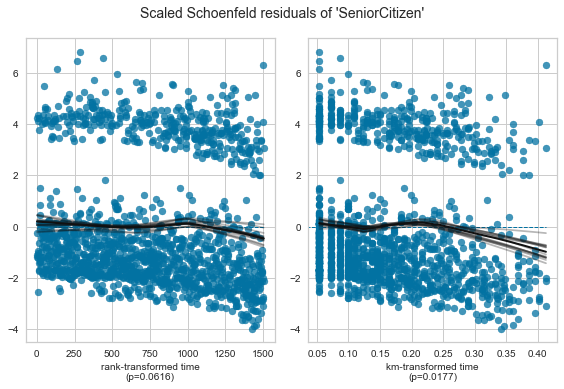

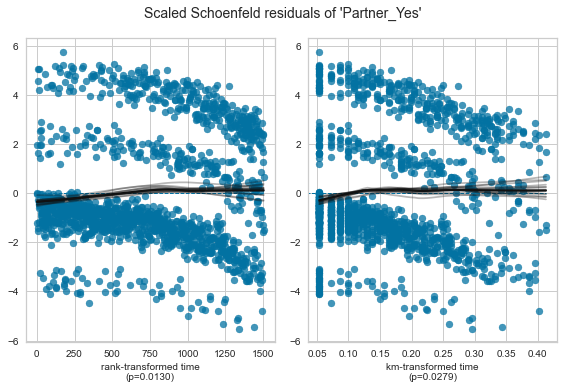

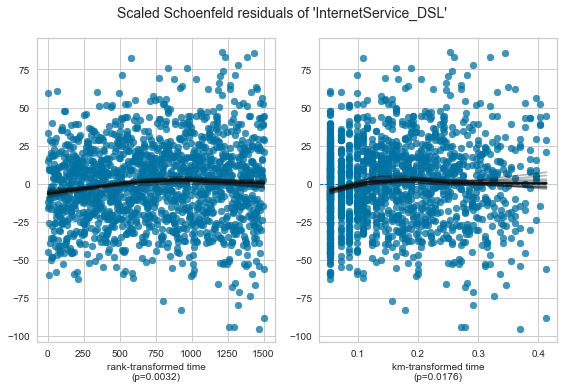

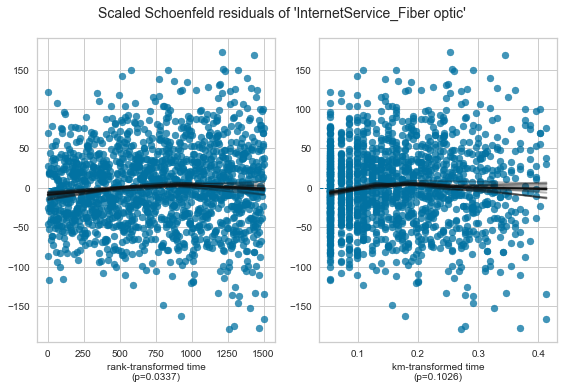

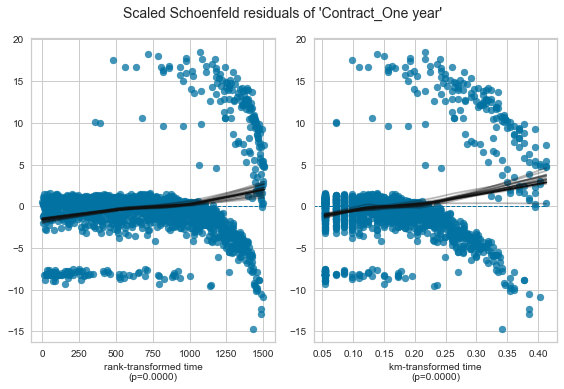

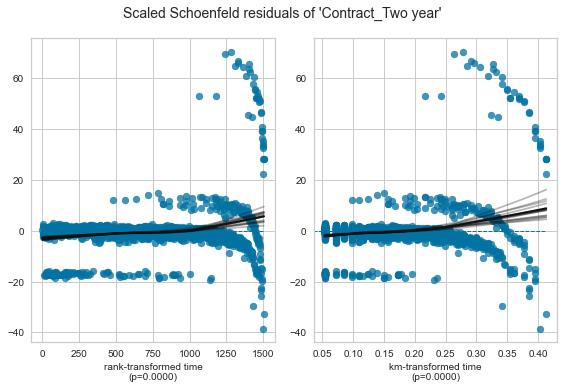

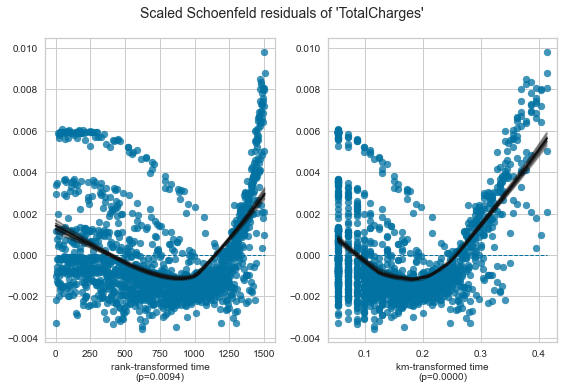

In [55]:
cph.check_assumptions(cph_train, p_value_threshold=0.05, show_plots=True)


## Churn Prediction


In [57]:
from lifelines.datasets import load_regression_dataset

df = load_regression_dataset()

censored_subjects = a.loc[a['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']]).clip(upper=1))

Applied ‘unconditioned’ survival functions because some of these curves will predict churn before the customer’s current tenure time. Moreover, need to condition the predictions on the basis that the customers were still with with the company when the data was collected.

The individual customers can be investigated from survival curve and see how the conditioning has affected their survival over the baseline rate.


Text(0.5, 1.0, 'Survival Curve')

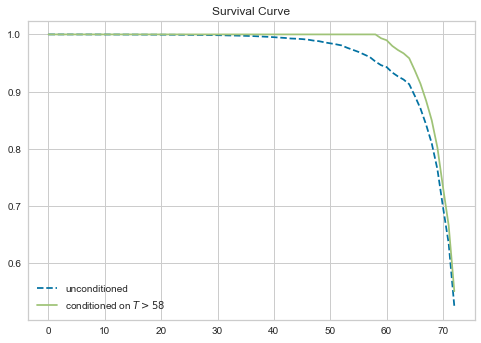

In [58]:
subject = 12
unconditioned_sf[subject].plot(ls="--", label="unconditioned")
conditioned_sf[subject].plot(label="conditioned on $T>58$")
plt.legend()
plt.title('Survival Curve')

The above plot shows that, customer 12 is still a customer after 58 months means his survival curve drops slower than the baseline for the customers similar but without that condition. There is around a 50% chance that a customer longer than 70 months (almost 6 years) will churn. Need to check if this is consistent with the business’ understanding of their customer life-cycle. If the customers are churning much earlier/later than the business perceives them to be, then the business may have to tweak the customer life-cycle management.

It also may be a good idea to intervene and incentive customers who have already stayed for 6 years. Since their probability of staying is dipping below 50%, then without intervention, they are more likely to churn than not to churn. However, these are business and strategy decesions to make.

Selecting a single customer as a prediction for how long the customer will last, which we can use to determine intervention value. Used the median to get a single row that has the number of months (tenure) where the customer has 50% likelihood of churning.

In [59]:
from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This is the same, but you can change the fraction to get other %tiles. 
# predictions_50 = qth_survival_times(.50, conditioned_sf)

In [61]:
# Using this single row and by joining it to our data DataFrame can investigate 
# the predicted remaining value a customer has for the business:

values = predictions_50.T.join(a[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

values.head()

,0.5,MonthlyCharges,tenure,RemainingValue
0,23.0,29.85,1,656.70
1,49.0,56.95,34,854.25
3,61.0,42.30,45,676.80
6,31.0,89.10,22,801.90
7,28.0,29.75,10,535.50


The column named 0.5 is the single row we received from the median_survival_times call. It can be seen here that, by multiplying the MonthlyCharges by the difference between the customer’s current tenure and their median cancellation date, a visbility is available for which customers would inflict the most damage to the top line. This single row can be joined to the origial data to investigate the predicted remaining value a customer has for the business. Moreover, by multiplying the MonthlyCharges by the difference between the customer’s current tenure and their median cancellation date, business may have an idea for which customers would inflict the most damage to their top line.

## Churn Prevention
A list of customers can be prepared now, who are the highest risk for churn. The goal would be to retain them.

Reviewing the coefficient chart again, the most significant features which impact survival positively are identified-

    - 2 year contract
    - 1 year contract
    - Credit Card payment
    - bank Transfer payment

Beyond these four the increases in survival become minimal and the results aren’t significant anyway. Stakeholders need to understand how much they can spend to keep customers is compare their survival rates with customer similar to them who instead have each of these four features present. Going to statistics again-

In [62]:
upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
            'Contract_One year',
            'Contract_Two year']

results_dict = {}
for customer in values.index:
    actual = a.loc[[customer]]
    change = a.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]
    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

In [63]:
actions.head()


,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
0,29.85,1,656.70,23.0,28.0,28.0,33.0,53.0
1,56.95,34,854.25,48.0,52.0,53.0,37.0,71.0
3,42.30,45,676.80,59.0,65.0,55.0,51.0,inf
6,89.10,22,801.90,26.0,21.0,31.0,37.0,56.0
7,29.75,10,535.50,26.0,31.0,32.0,37.0,56.0


It can be seen from this that if telecom company can manage to get the first customer to use a Credit Card payments that could increase the survival time by 3 months (26– 23 baseline) and so on. This input helps to take necessary strategy to retain customers.
##### To understand the financial impact-

In [69]:
actions['CreditCard Diff'] = (
    actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['BankTransfer Diff'] = (
    actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['1yrContract Diff'] = (
    actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']

actions['2yrContract Diff'] = (
    actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

actions.head()

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
0,29.85,1,656.70,23.0,28.0,28.0,33.0,53.0,149.25,149.25,298.50,895.50
1,56.95,34,854.25,48.0,52.0,53.0,37.0,71.0,227.80,284.75,-626.45,1309.85
3,42.30,45,676.80,59.0,65.0,55.0,51.0,inf,253.80,-169.20,-338.40,inf
6,89.10,22,801.90,26.0,21.0,31.0,37.0,56.0,-445.50,445.50,980.10,2673.00
7,29.75,10,535.50,26.0,31.0,32.0,37.0,56.0,148.75,178.50,327.25,892.50


Here, the moving the customer in the first row to paying by Credit Card could be worth up to dollar 119.40. That’ is a valuable information for business to check.
#### Accuracy and Calibration
Though model displayed 92.9% concordance, but considering probabilistic view of events like Churn it is necessary to check for calibration than accuracy.

Text(0.5, 1.0, 'Calibration plot for Churn prediction')

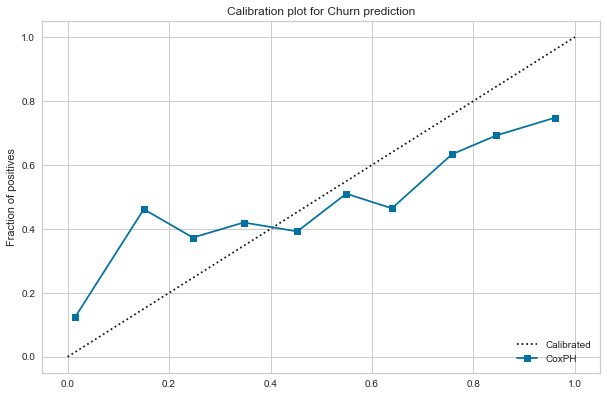

In [74]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Calibrated")

probs = 1 - np.array(cph.predict_survival_function(cph_test).iloc[13])
actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = \
calibration_curve(actual, probs, n_bins=10, normalize=False)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
        label="%s" % ("CoxPH",))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot for Churn prediction')

Running the example creates a reliability diagram showing the calibration of the predicted probabilities (solid line) compared to a perfectly calibrated model along the diagonal of the plot (dashed line.). The CoxPh line is closer to the diagonal line representing good calibration. However, the model seems to underpredict risk at the low end (< 50% chance of churn) and slightly overpredict risk at the high end (> 50% chance of churn).

In [118]:
from sklearn.metrics import brier_score_loss
brier_score_loss(
    cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1
    )

0.16295028651764643

Indexing at tenure is set at 13 because the model works over a range of time periods, so, have to inspect the calibration at each step in order to get a feel for accuracy.


In [123]:
loss_df.columns = ['loss']
temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff'])
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff'])

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [124]:
temp_df.head()


,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,loss
index,,,,,,,,,,,,,,,,,,
936,80.85,0,2991.45,37.0,41.0,41.0,47.0,323.40,323.40,808.50,-2425.5,237.452222,409.347778,280.426111,366.373889,685.154985,931.845015,0.169629
6670,73.35,0,2787.30,38.0,43.0,43.0,49.0,366.75,366.75,806.85,-2200.5,263.748842,469.751158,315.249421,418.250579,677.717668,935.982332,0.167339
5602,80.25,6,2808.75,40.0,46.0,46.0,51.0,481.50,481.50,882.75,-2407.5,339.365483,623.634517,410.432741,552.567259,736.179273,1029.320727,0.163789
6818,71.10,3,2772.90,42.0,47.0,47.0,53.0,355.50,355.50,782.10,-2204.1,247.029616,463.970384,301.264808,409.735192,645.815305,918.384695,0.163119
2898,63.40,6,2599.40,47.0,52.0,53.0,57.0,317.00,380.40,634.00,-1965.4,209.865782,424.134218,314.113466,446.686534,514.903962,753.096038,0.165543


For each time period telecom company wants to predict that a specific upgrade will produce and create a lower and upper bound around the estimated return on investment.
